## Coronavírus São Paulo

Fonte dos dados: https://www.seade.gov.br/coronavirus/ e https://github.com/seade-R/dados-covid-sp

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/seade-R/dados-covid-sp/master/data/dados_covid_sp.csv", sep = ";", decimal = ',')

In [3]:
data.head(5)

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,0.0,0.0,0,0,0.0,0.0,0.0,RA de Presidente Prudente,9,Marília,5,33894,7398,41199,0,8.0,-21.6820,-51.0737,9.0
1,Adolfo,3500204,25,2,2020-02-25,0,0,0.0,0.0,0,0,0.0,0.0,0.0,RA de São José do Rio Preto,14,São José do Rio Preto,15,3447,761,21106,0,8.0,-21.2325,-49.6451,9.0
2,Aguaí,3500303,25,2,2020-02-25,0,0,0.0,0.0,0,0,0.0,0.0,0.0,RA de Campinas,4,São João da Boa Vista,14,35608,5245,47455,0,8.0,-22.0572,-46.9735,9.0
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,0.0,0.0,0,0,0.0,0.0,0.0,RA de Campinas,4,São João da Boa Vista,14,7797,1729,14267,0,8.0,-21.9319,-46.7176,9.0
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,0.0,0.0,0,0,0.0,0.0,0.0,RA de Campinas,4,Campinas,3,18374,3275,6013,0,8.0,-22.4733,-46.6314,9.0


In [4]:
data['datahora'] = pd.to_datetime(data['datahora'])

In [5]:
condi = data[data['nome_munic'] == "Ignorado"]

In [6]:
data.drop(condi.index, inplace = True)

In [7]:
plt.style.use('bmh')

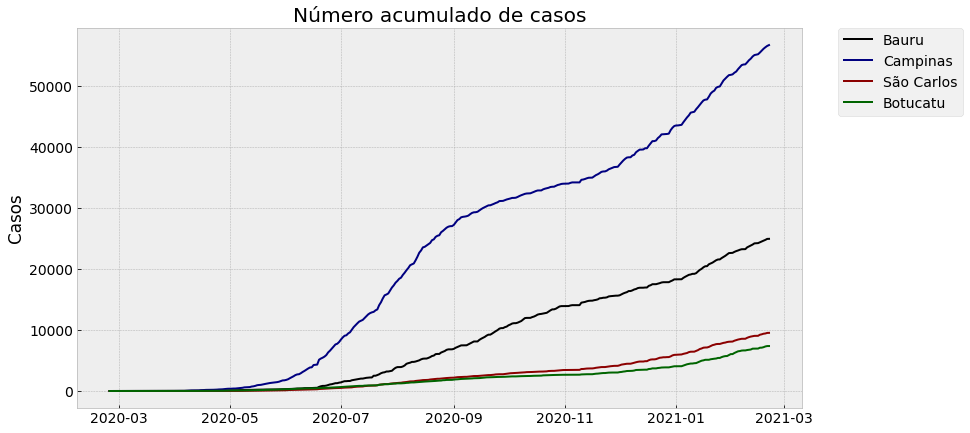

In [8]:
plt.figure(figsize=(13,7))
plt.rcParams.update({'font.size': 14})
plt.plot(data[data['nome_munic'] == 'Bauru']['datahora'], data[data['nome_munic'] == 'Bauru']['casos'], 'black', label = 'Bauru')
plt.plot(data[data['nome_munic'] == 'Campinas']['datahora'], data[data['nome_munic'] == 'Campinas']['casos'], 'navy', label = 'Campinas')
plt.plot(data[data['nome_munic'] == 'São Carlos']['datahora'], data[data['nome_munic'] == 'São Carlos']['casos'], 'darkred', label = 'São Carlos')
plt.plot(data[data['nome_munic'] == 'Botucatu']['datahora'], data[data['nome_munic'] == 'Botucatu']['casos'], 'darkgreen', label = 'Botucatu')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylabel('Casos')
plt.title('Número acumulado de casos')
plt.show()

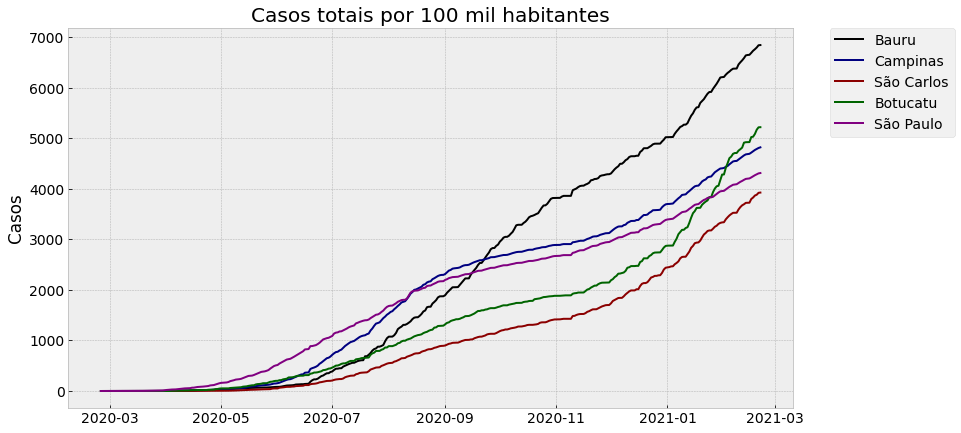

In [9]:
plt.figure(figsize=(13,7))
plt.rcParams.update({'font.size': 14})
plt.plot(data[data['nome_munic'] == 'Bauru']['datahora'], data[data['nome_munic'] == 'Bauru']['casos_pc'], 'black', label = 'Bauru')
plt.plot(data[data['nome_munic'] == 'Campinas']['datahora'], data[data['nome_munic'] == 'Campinas']['casos_pc'], 'navy', label = 'Campinas')
plt.plot(data[data['nome_munic'] == 'São Carlos']['datahora'], data[data['nome_munic'] == 'São Carlos']['casos_pc'], 'darkred', label = 'São Carlos')
plt.plot(data[data['nome_munic'] == 'Botucatu']['datahora'], data[data['nome_munic'] == 'Botucatu']['casos_pc'], 'darkgreen', label = 'Botucatu')
plt.plot(data[data['nome_munic'] == 'São Paulo']['datahora'], data[data['nome_munic'] == 'São Paulo']['casos_pc'], 'purple', label = 'São Paulo')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylabel('Casos')
plt.title('Casos totais por 100 mil habitantes')
plt.show()

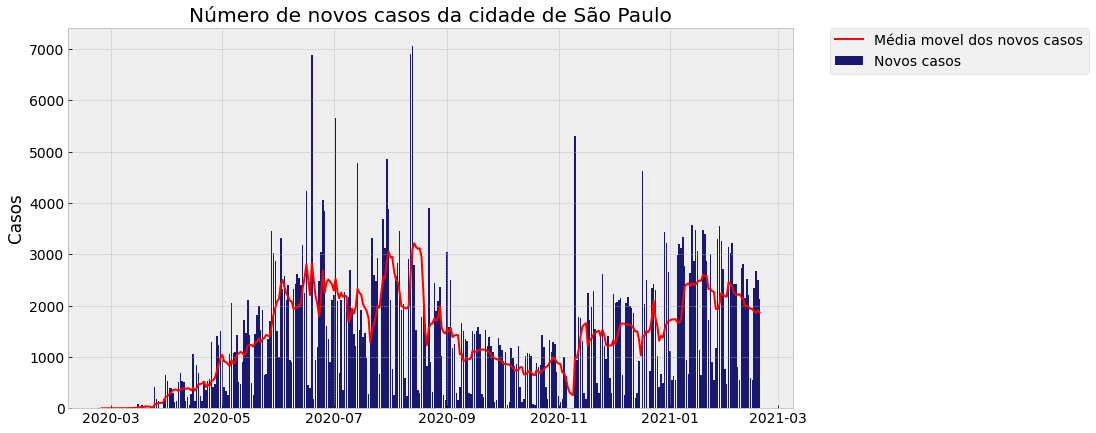

In [ ]:
plt.figure(figsize=(13,7))
plt.rcParams.update({'font.size': 14})
plt.bar(data[data['nome_munic'] == 'São Paulo']['datahora'], data[data['nome_munic'] == 'São Paulo']['casos_novos'], label = 'Novos casos', color = 'midnightblue')
plt.plot(data[data['nome_munic'] == 'São Paulo']['datahora'], data[data['nome_munic'] == 'São Paulo']['casos_mm7d'],color = 'red',label = 'Média movel dos novos casos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylabel('Casos')
plt.title('Número de novos casos da cidade de São Paulo')
plt.show()

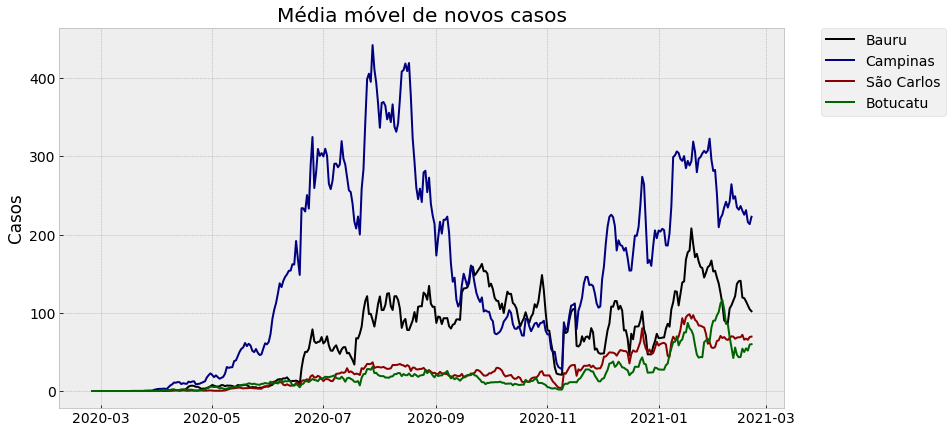

In [10]:
plt.figure(figsize=(13,7))
plt.rcParams.update({'font.size': 14})
plt.plot(data[data['nome_munic'] == 'Bauru']['datahora'], data[data['nome_munic'] == 'Bauru']['casos_mm7d'], 'black', label = 'Bauru')
plt.plot(data[data['nome_munic'] == 'Campinas']['datahora'], data[data['nome_munic'] == 'Campinas']['casos_mm7d'], 'navy', label = 'Campinas')
plt.plot(data[data['nome_munic'] == 'São Carlos']['datahora'], data[data['nome_munic'] == 'São Carlos']['casos_mm7d'], 'darkred', label = 'São Carlos')
plt.plot(data[data['nome_munic'] == 'Botucatu']['datahora'], data[data['nome_munic'] == 'Botucatu']['casos_mm7d'], 'darkgreen', label = 'Botucatu')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylabel('Casos')
plt.title('Média móvel de novos casos')
plt.show()

In [11]:
teste2 = data.groupby(['nome_munic', data['datahora'].dt.year, data['datahora'].dt.month], as_index = False).agg({'casos_novos':[max, sum], 'mes':['first']})

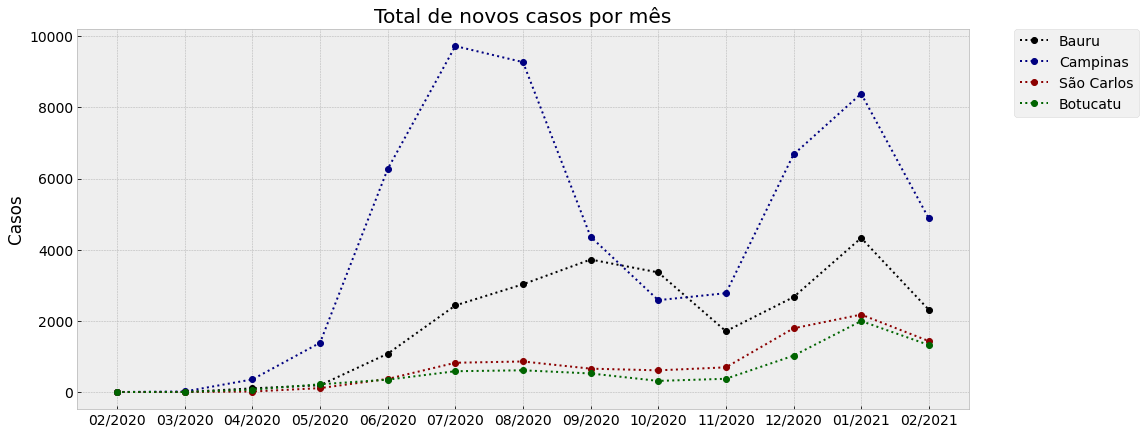

In [12]:
plt.figure(figsize=(16,7))
plt.rcParams.update({'font.size': 14})
plt.plot(['02/2020','03/2020', '04/2020', '05/2020', '06/2020', '07/2020', '08/2020', '09/2020', '10/2020', '11/2020', '12/2020', '01/2021', '02/2021'],teste2[teste2['nome_munic'] == 'Bauru']['casos_novos']['sum'], 'black', marker = 'o', linestyle = ':', label = 'Bauru')
plt.plot(['02/2020','03/2020', '04/2020', '05/2020', '06/2020', '07/2020', '08/2020', '09/2020', '10/2020', '11/2020', '12/2020', '01/2021', '02/2021'],teste2[teste2['nome_munic'] == 'Campinas']['casos_novos']['sum'], 'navy', marker = 'o', linestyle = ':', label = 'Campinas')
plt.plot(['02/2020','03/2020', '04/2020', '05/2020', '06/2020', '07/2020', '08/2020', '09/2020', '10/2020', '11/2020', '12/2020', '01/2021', '02/2021'],teste2[teste2['nome_munic'] == 'São Carlos']['casos_novos']['sum'], 'darkred', marker = 'o', linestyle = ':', label = 'São Carlos')
plt.plot(['02/2020','03/2020', '04/2020', '05/2020', '06/2020', '07/2020', '08/2020', '09/2020', '10/2020', '11/2020', '12/2020', '01/2021', '02/2021'],teste2[teste2['nome_munic'] == 'Botucatu']['casos_novos']['sum'], 'darkgreen', marker = 'o', linestyle = ':', label = 'Botucatu')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylabel('Casos')
plt.title('Total de novos casos por mês')
plt.show()

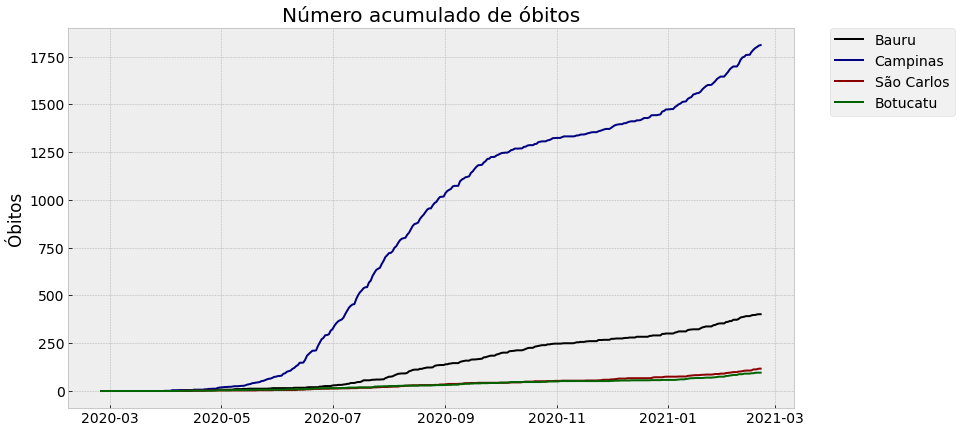

In [13]:
plt.figure(figsize=(13,7))
plt.rcParams.update({'font.size': 14})
plt.plot(data[data['nome_munic'] == 'Bauru']['datahora'], data[data['nome_munic'] == 'Bauru']['obitos'], 'black', label = 'Bauru')
plt.plot(data[data['nome_munic'] == 'Campinas']['datahora'], data[data['nome_munic'] == 'Campinas']['obitos'], 'navy', label = 'Campinas')
plt.plot(data[data['nome_munic'] == 'São Carlos']['datahora'], data[data['nome_munic'] == 'São Carlos']['obitos'], 'darkred', label = 'São Carlos')
plt.plot(data[data['nome_munic'] == 'Botucatu']['datahora'], data[data['nome_munic'] == 'Botucatu']['obitos'], 'darkgreen', label = 'Botucatu')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylabel('Óbitos')
plt.title('Número acumulado de óbitos')
plt.show()

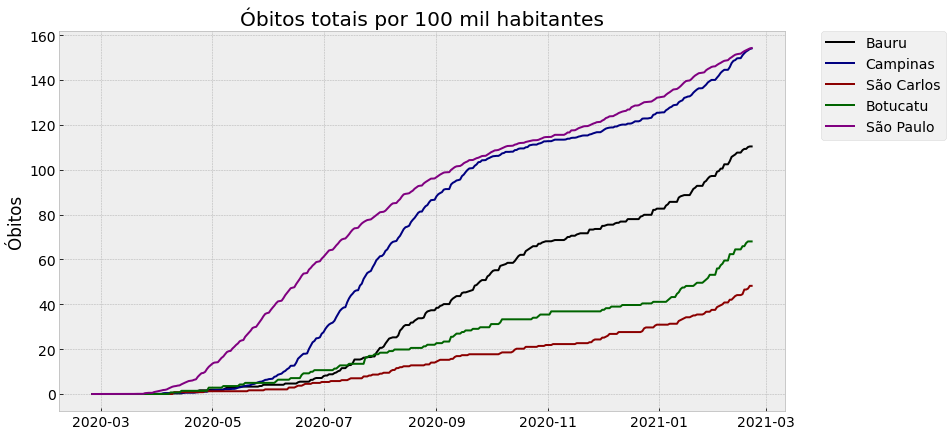

In [14]:
plt.figure(figsize=(13,7))
plt.rcParams.update({'font.size': 14})
plt.plot(data[data['nome_munic'] == 'Bauru']['datahora'], data[data['nome_munic'] == 'Bauru']['obitos_pc'], 'black', label = 'Bauru')
plt.plot(data[data['nome_munic'] == 'Campinas']['datahora'], data[data['nome_munic'] == 'Campinas']['obitos_pc'], 'navy', label = 'Campinas')
plt.plot(data[data['nome_munic'] == 'São Carlos']['datahora'], data[data['nome_munic'] == 'São Carlos']['obitos_pc'], 'darkred', label = 'São Carlos')
plt.plot(data[data['nome_munic'] == 'Botucatu']['datahora'], data[data['nome_munic'] == 'Botucatu']['obitos_pc'], 'darkgreen', label = 'Botucatu')
plt.plot(data[data['nome_munic'] == 'São Paulo']['datahora'], data[data['nome_munic'] == 'São Paulo']['obitos_pc'], 'purple', label = 'São Paulo')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylabel('Óbitos')
plt.title('Óbitos totais por 100 mil habitantes')
plt.show()

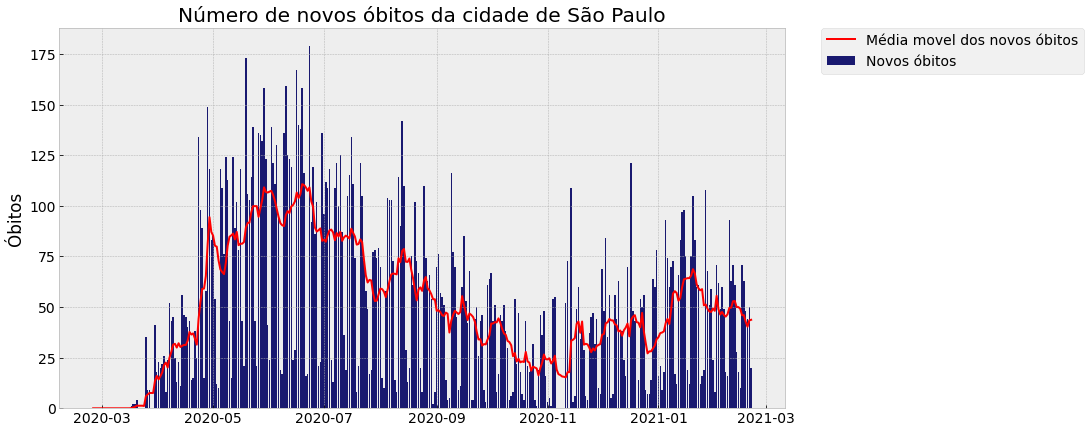

In [15]:
plt.figure(figsize=(13,7))
plt.rcParams.update({'font.size': 14})
plt.bar(data[data['nome_munic'] == 'São Paulo']['datahora'], data[data['nome_munic'] == 'São Paulo']['obitos_novos'], label = 'Novos óbitos', color = 'midnightblue')
plt.plot(data[data['nome_munic'] == 'São Paulo']['datahora'], data[data['nome_munic'] == 'São Paulo']['obitos_mm7d'],color = 'red',label = 'Média movel dos novos óbitos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylabel('Óbitos')
plt.title('Número de novos óbitos da cidade de São Paulo')
plt.show()

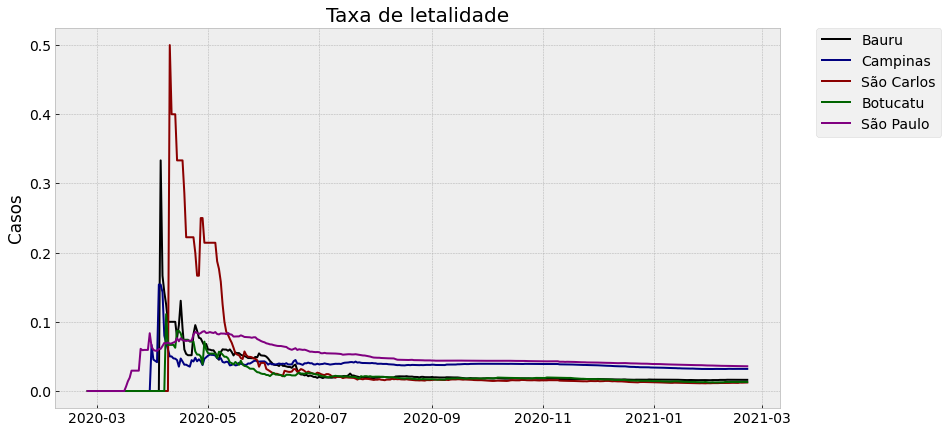

In [16]:
plt.figure(figsize=(13,7))
plt.rcParams.update({'font.size': 14})
plt.plot(data[data['nome_munic'] == 'Bauru']['datahora'], data[data['nome_munic'] == 'Bauru']['letalidade'], 'black', label = 'Bauru')
plt.plot(data[data['nome_munic'] == 'Campinas']['datahora'], data[data['nome_munic'] == 'Campinas']['letalidade'], 'navy', label = 'Campinas')
plt.plot(data[data['nome_munic'] == 'São Carlos']['datahora'], data[data['nome_munic'] == 'São Carlos']['letalidade'], 'darkred', label = 'São Carlos')
plt.plot(data[data['nome_munic'] == 'Botucatu']['datahora'], data[data['nome_munic'] == 'Botucatu']['letalidade'], 'darkgreen', label = 'Botucatu')
plt.plot(data[data['nome_munic'] == 'São Paulo']['datahora'], data[data['nome_munic'] == 'São Paulo']['letalidade'], 'purple', label = 'São Paulo')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylabel('Casos')
plt.title('Taxa de letalidade')
plt.show()

In [17]:
testedrs = data.groupby(['nome_drs', data['datahora'].dt.year, data['datahora'].dt.month, data['datahora'].dt.day], as_index = False).agg({'casos_novos':[sum], 'casos_mm7d':[sum], 'casos':[sum], 'pop':[sum], 'obitos_novos':[sum], 'obitos_mm7d':[sum], 'obitos':[sum], 'datahora':['first']})

In [18]:
testedrs['casos_pc'] = (testedrs['casos']['sum']/testedrs['pop']['sum'])*100000
testedrs['obitos_pc'] = (testedrs['obitos']['sum']/testedrs['pop']['sum'])*100000

In [19]:
testedrs['nome_drs'].unique()

array(['Araraquara', 'Araçatuba', 'Baixada Santista', 'Barretos', 'Bauru',
       'Campinas', 'Franca', 'Grande São Paulo', 'Marília', 'Piracicaba',
       'Presidente Prudente', 'Registro', 'Ribeirão Preto', 'Sorocaba',
       'São José do Rio Preto', 'São João da Boa Vista', 'Taubaté'],
      dtype=object)

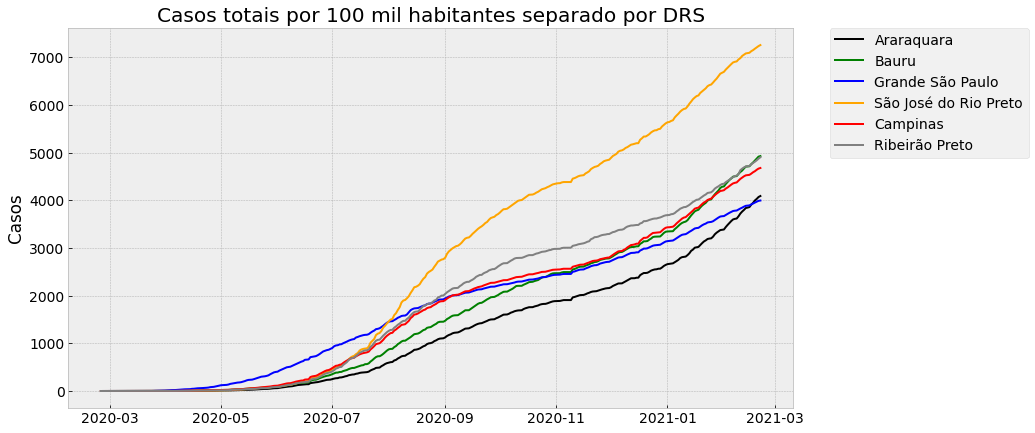

In [20]:
plt.figure(figsize=(13,7))
plt.rcParams.update({'font.size': 14})
plt.plot(testedrs[testedrs['nome_drs'] == 'Araraquara']['datahora']['first'], testedrs[testedrs['nome_drs'] == 'Araraquara']['casos_pc'], 'black', label = 'Araraquara')
plt.plot(testedrs[testedrs['nome_drs'] == 'Bauru']['datahora']['first'], testedrs[testedrs['nome_drs'] == 'Bauru']['casos_pc'], 'green', label = 'Bauru')
plt.plot(testedrs[testedrs['nome_drs'] == 'Grande São Paulo']['datahora']['first'], testedrs[testedrs['nome_drs'] == 'Grande São Paulo']['casos_pc'], 'blue', label = 'Grande São Paulo')
plt.plot(testedrs[testedrs['nome_drs'] == 'São José do Rio Preto']['datahora']['first'], testedrs[testedrs['nome_drs'] == 'São José do Rio Preto']['casos_pc'], 'orange', label = 'São José do Rio Preto')
plt.plot(testedrs[testedrs['nome_drs'] == 'Campinas']['datahora']['first'], testedrs[testedrs['nome_drs'] == 'Campinas']['casos_pc'], 'red', label = 'Campinas')
plt.plot(testedrs[testedrs['nome_drs'] == 'Ribeirão Preto']['datahora']['first'], testedrs[testedrs['nome_drs'] == 'Ribeirão Preto']['casos_pc'], 'grey', label = 'Ribeirão Preto')
plt.ylabel('Casos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Casos totais por 100 mil habitantes separado por DRS')
plt.show()

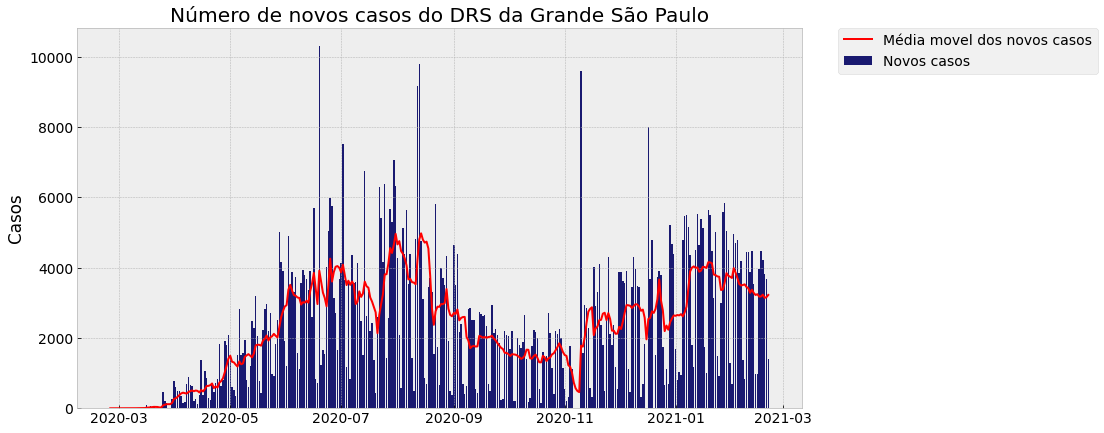

In [23]:
plt.figure(figsize=(13,7))
plt.rcParams.update({'font.size': 14})
plt.bar(testedrs[testedrs['nome_drs'] == 'Grande São Paulo']['datahora']['first'], testedrs[testedrs['nome_drs'] == 'Grande São Paulo']['casos_novos']['sum'], label = 'Novos casos', color = 'midnightblue')
plt.plot(testedrs[testedrs['nome_drs'] == 'Grande São Paulo']['datahora']['first'], testedrs[testedrs['nome_drs'] == 'Grande São Paulo']['casos_mm7d']['sum'],color = 'red',label = 'Média movel dos novos casos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylabel('Casos')
plt.title('Número de novos casos do DRS da Grande São Paulo')
plt.show()

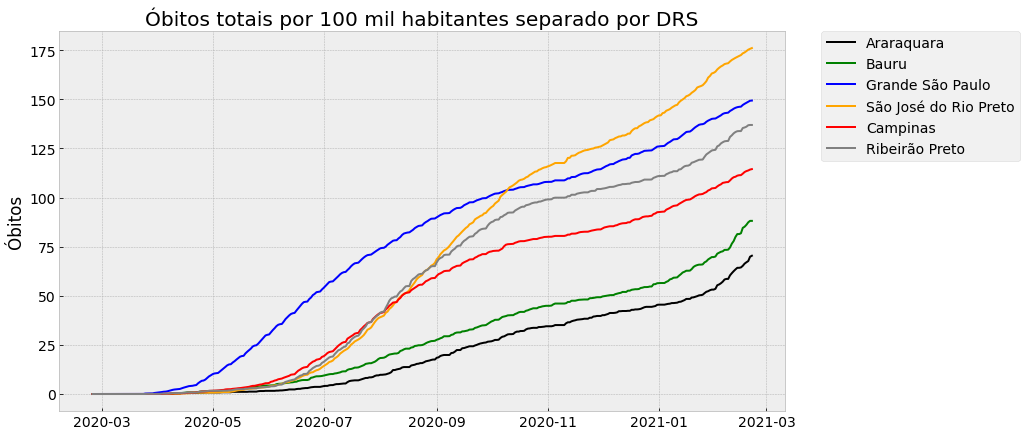

In [24]:
plt.figure(figsize=(13,7))
plt.rcParams.update({'font.size': 14})
plt.plot(testedrs[testedrs['nome_drs'] == 'Araraquara']['datahora']['first'], testedrs[testedrs['nome_drs'] == 'Araraquara']['obitos_pc'], 'black', label = 'Araraquara')
plt.plot(testedrs[testedrs['nome_drs'] == 'Bauru']['datahora']['first'], testedrs[testedrs['nome_drs'] == 'Bauru']['obitos_pc'], 'green', label = 'Bauru')
plt.plot(testedrs[testedrs['nome_drs'] == 'Grande São Paulo']['datahora']['first'], testedrs[testedrs['nome_drs'] == 'Grande São Paulo']['obitos_pc'], 'blue', label = 'Grande São Paulo')
plt.plot(testedrs[testedrs['nome_drs'] == 'São José do Rio Preto']['datahora']['first'], testedrs[testedrs['nome_drs'] == 'São José do Rio Preto']['obitos_pc'], 'orange', label = 'São José do Rio Preto')
plt.plot(testedrs[testedrs['nome_drs'] == 'Campinas']['datahora']['first'], testedrs[testedrs['nome_drs'] == 'Campinas']['obitos_pc'], 'red', label = 'Campinas')
plt.plot(testedrs[testedrs['nome_drs'] == 'Ribeirão Preto']['datahora']['first'], testedrs[testedrs['nome_drs'] == 'Ribeirão Preto']['obitos_pc'], 'grey', label = 'Ribeirão Preto')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylabel('Óbitos')
plt.title('Óbitos totais por 100 mil habitantes separado por DRS')
plt.show()

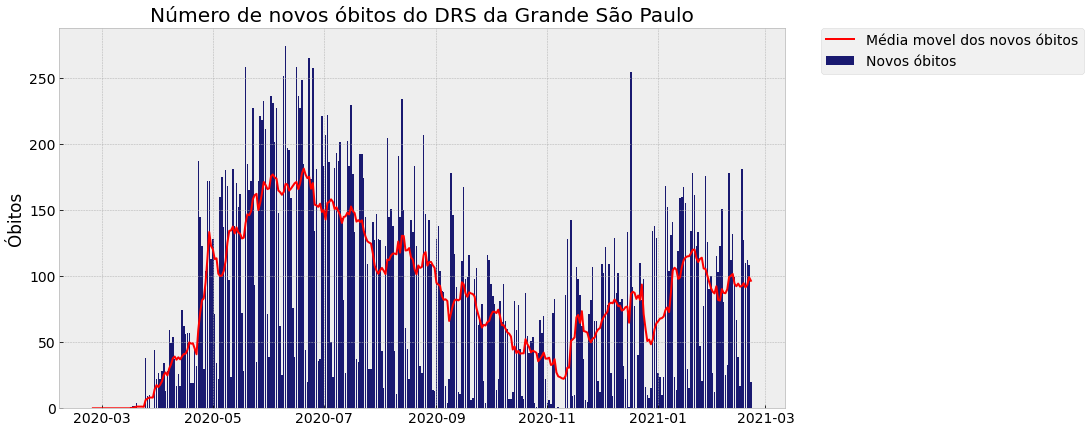

In [25]:
plt.figure(figsize=(13,7))
plt.rcParams.update({'font.size': 14})
plt.bar(testedrs[testedrs['nome_drs'] == 'Grande São Paulo']['datahora']['first'], testedrs[testedrs['nome_drs'] == 'Grande São Paulo']['obitos_novos']['sum'], label = 'Novos óbitos', color = 'midnightblue')
plt.plot(testedrs[testedrs['nome_drs'] == 'Grande São Paulo']['datahora']['first'], testedrs[testedrs['nome_drs'] == 'Grande São Paulo']['obitos_mm7d']['sum'],color = 'red',label = 'Média movel dos novos óbitos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylabel('Óbitos')
plt.title('Número de novos óbitos do DRS da Grande São Paulo')
plt.show()

In [ ]:
testedrs['letalidade'] = testedrs['obitos']['sum']/testedrs['casos']['sum']

# Mapa

In [26]:
condi = data[(data["datahora"].dt.month == 2) & (data["datahora"].dt.year == 2020)]
data.drop(condi.index, inplace = True)

In [28]:
mapa1 = data.groupby(['nome_munic', 'codigo_ibge', 'pop',data['datahora'].dt.year, data['datahora'].dt.month], as_index = False).agg({'casos_novos':[sum], 'obitos_novos':[sum], 'mes':['first'], 'pop':['first']})

In [29]:
mapa1fev = mapa1.loc[mapa1['mes']['first'] == 2, ['codigo_ibge']]
mapa1fev['casos_novos'] = mapa1['casos_novos']['sum']
mapa1fev['pop']= mapa1['pop']['first']

In [30]:
mapa1fev['casos_novospc'] = (mapa1fev['casos_novos']/mapa1fev['pop'])*100000

In [31]:
mapa1fev['codigo_ibge'] = mapa1fev['codigo_ibge'].astype('str') 

In [32]:
import requests
import json
import folium
geomapa = json.loads(requests.get("https://raw.githubusercontent.com/tbrugz/geodata-br/master/geojson/geojs-35-mun.json").text)

In [41]:
#bins = list(mapa1fev['casos_novospc'].quantile([0,0.25,0.5,0.75,1]))
bins = [0,250,450,650,750,1000,2000,3008]
threshold_scale = np.linspace(mapa1fev['casos_novos'].min(),mapa1fev['casos_novos'].max(), 10, dtype=int) 
threshold_scale = threshold_scale.tolist()
m2 = folium.Map(location=[-22.2963, -48.5587], zoom_start=6.5)

#Criar a camada Choroplet
folium.Choropleth(
    geo_data=geomapa,
    bins = bins,
    name='choropleth',
    data=mapa1fev,
    columns=['codigo_ibge', 'casos_novospc'],
    key_on='feature.properties.id',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.7,
    legend_name='Números de casos por 100 mil habitantes de Fevereiro',
    reset = True,
).add_to(m2)# Visualizar
m2

Output hidden; open in https://colab.research.google.com to view.

In [34]:
mapa1fev['obitos_novos'] = mapa1['obitos_novos']['sum']

In [35]:
mapa1fev['obitos_novospc'] = (mapa1fev['obitos_novos']/mapa1fev['pop'])*100000

In [42]:
#bins = list(mapa1fev['obitos_novospc'].quantile([0,0.25,0.5,0.75,1]))
bins = [0,8,15,25,35,50,70,80,100,150]
#threshold_scale = np.linspace(mapa1fev['casos_novos'].min(),mapa1fev['casos_novos'].max(), 10, dtype=int) 
#threshold_scale = threshold_scale.tolist()
m2 = folium.Map(location=[-22.2963, -48.5587], zoom_start=6.5)

#Criar a camada Choroplet
folium.Choropleth(
    geo_data=geomapa,
    bins = bins,
    name='choropleth',
    data=mapa1fev,
    columns=['codigo_ibge', 'obitos_novospc'],
    key_on='feature.properties.id',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.7,
    legend_name='Números de casos por 100 mil habitantes de Fevereiro',
    reset = True,
).add_to(m2)# Visualizar
m2

Output hidden; open in https://colab.research.google.com to view.

In [43]:
data2 = pd.read_csv("https://raw.githubusercontent.com/seade-R/dados-covid-sp/master/data/plano_sp_leitos_internacoes_serie_nova_variacao_semanal.csv", sep = ";", decimal = ',')

In [44]:
data2["datahora"] =  pd.to_datetime(data2["datahora"])

In [45]:
data2['datahora'].max()

Timestamp('2021-02-21 00:00:00')

In [46]:
data2.loc[data2['datahora'].dt.month == 1,'mes'] = 'Janeiro'
data2.loc[data2['datahora'].dt.month == 10,'mes'] = 'Outubro'
data2.loc[data2['datahora'].dt.month ==11,'mes'] = 'Novembro'
data2.loc[data2['datahora'].dt.month == 12,'mes'] = 'Dezembro'
data2.loc[data2['datahora'].dt.month == 2,'mes'] = 'Fevereiro'

In [47]:
teste = data2.groupby(['nome_drs', data2['datahora'].dt.year, data2["datahora"].dt.month], as_index = False).agg({'ocupacao_leitos':['mean'], 'leitos_pc':['mean'], 'mes':['first']})

In [48]:
teste['nome_drs'].unique()

array(['DRS 01 Grande São Paulo', 'DRS 02 Araçatuba', 'DRS 03 Araraquara',
       'DRS 04 Baixada Santista', 'DRS 05 Barretos', 'DRS 06 Bauru',
       'DRS 07 Campinas', 'DRS 08 Franca', 'DRS 09 Marília',
       'DRS 10 Piracicaba', 'DRS 11 Presidente Prudente',
       'DRS 12 Registro', 'DRS 13 Ribeirão Preto',
       'DRS 14 São João da Boa Vista', 'DRS 15 São José do Rio Preto',
       'DRS 16 Sorocaba', 'DRS 17 Taubaté', 'Estado de São Paulo'],
      dtype=object)

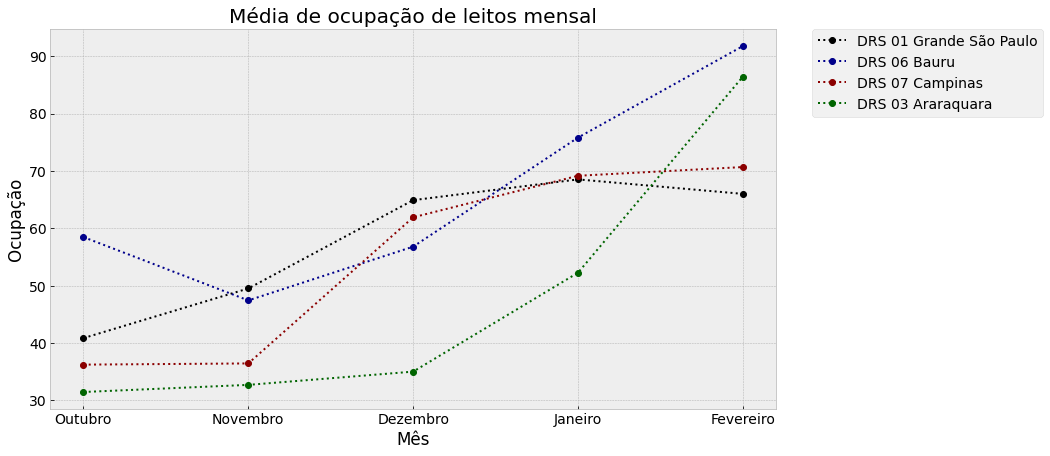

In [49]:
plt.figure(figsize=(13,7))
plt.style.use('bmh')
plt.rcParams.update({'font.size': 14})
plt.plot(teste[teste['nome_drs'] == 'DRS 01 Grande São Paulo']['mes']['first'], teste[teste['nome_drs'] == 'DRS 01 Grande São Paulo']['ocupacao_leitos']['mean'], 'black', marker = 'o', linestyle = ':', label = 'DRS 01 Grande São Paulo')
plt.plot(teste[teste['nome_drs'] == 'DRS 06 Bauru']['mes']['first'], teste[teste['nome_drs'] == 'DRS 06 Bauru']['ocupacao_leitos']['mean'], 'darkblue', marker = 'o', linestyle = ':', label = 'DRS 06 Bauru')
plt.plot(teste[teste['nome_drs'] == 'DRS 07 Campinas']['mes']['first'], teste[teste['nome_drs'] == 'DRS 07 Campinas']['ocupacao_leitos']['mean'], 'darkred', marker = 'o', linestyle = ':', label = 'DRS 07 Campinas')
plt.plot(teste[teste['nome_drs'] == 'DRS 03 Araraquara']['mes']['first'], teste[teste['nome_drs'] == 'DRS 03 Araraquara']['ocupacao_leitos']['mean'], 'darkgreen', marker = 'o', linestyle = ':', label = 'DRS 03 Araraquara')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Mês')
plt.ylabel('Ocupação')
plt.title('Média de ocupação de leitos mensal')
plt.show()

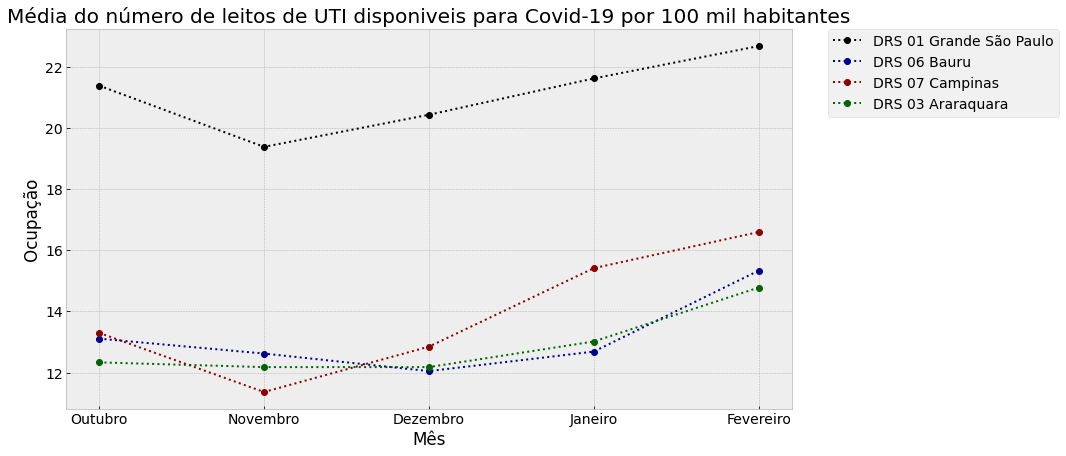

In [50]:
plt.figure(figsize=(13,7))
plt.style.use('bmh')
plt.rcParams.update({'font.size': 14})
plt.plot(teste[teste['nome_drs'] == 'DRS 01 Grande São Paulo']['mes']['first'], teste[teste['nome_drs'] == 'DRS 01 Grande São Paulo']['leitos_pc']['mean'], 'black', marker = 'o', linestyle = ':', label = 'DRS 01 Grande São Paulo')
plt.plot(teste[teste['nome_drs'] == 'DRS 06 Bauru']['mes']['first'], teste[teste['nome_drs'] == 'DRS 06 Bauru']['leitos_pc']['mean'], 'darkblue', marker = 'o', linestyle = ':', label = 'DRS 06 Bauru')
plt.plot(teste[teste['nome_drs'] == 'DRS 07 Campinas']['mes']['first'], teste[teste['nome_drs'] == 'DRS 07 Campinas']['leitos_pc']['mean'], 'darkred', marker = 'o', linestyle = ':', label = 'DRS 07 Campinas')
plt.plot(teste[teste['nome_drs'] == 'DRS 03 Araraquara']['mes']['first'], teste[teste['nome_drs'] == 'DRS 03 Araraquara']['leitos_pc']['mean'], 'darkgreen', marker = 'o', linestyle = ':', label = 'DRS 03 Araraquara')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Mês')
plt.ylabel('Ocupação')
plt.title('Média do número de leitos de UTI disponiveis para Covid-19 por 100 mil habitantes')
plt.show()

In [51]:
mapa2 = data2[data2['datahora'] == data2['datahora'].max()][['nome_drs','pacientes_uti_mm7d', 'ocupacao_leitos', 'leitos_pc', 'pop']]

In [52]:
def string(x):
  if ('DRS' in x):
    a = ' '.join(x.split()[2:])
    return(a)
  else:
    return(x)

In [53]:
mapa2['nome_drs'] = mapa2['nome_drs'].apply(lambda x: string(x))

In [54]:
mapa2.loc[2430,'nome_drs'] = 'São Paulo'
condi = data[data['nome_munic'] == "Ignorado"]

In [55]:
condi = mapa2[mapa2['nome_drs'] == 'Estado de São Paulo']

In [56]:
mapa2.drop(condi.index, inplace = True)

In [57]:
mapa2['nome_munic'] = mapa2['nome_drs']

In [58]:
data = data[data['datahora'] == data['datahora'].max()]

In [59]:
Mapafinal = pd.merge(mapa2, data, how = 'inner', on = ['nome_drs','nome_munic'])

In [60]:
Mapafinal = Mapafinal[['nome_drs', 'pacientes_uti_mm7d', 'ocupacao_leitos', 'leitos_pc', 'pop_x', 'latitude', 'longitude']]

In [61]:
sp = pd.Series(['São Paulo', 3243.00, 67.30, 22.80, 21138247, -23.5489,-46.6388], index = ['nome_drs', 'pacientes_uti_mm7d', 'ocupacao_leitos', 'leitos_pc', 'pop_x', 'latitude', 'longitude'])


In [62]:
Mapafinal = Mapafinal.append(sp, ignore_index=True)

In [63]:
import folium

In [64]:
m2 = folium.Map(location=[-22.2963, -48.5587], zoom_start=6.5)

In [65]:
for i in range(0, len(Mapafinal)):
  folium.Circle(
      location = [float(Mapafinal.iloc[i]['latitude']), float(Mapafinal.iloc[i]['longitude'])],
      popup = Mapafinal.iloc[i]['nome_drs'],
      radius = Mapafinal.iloc[i]['ocupacao_leitos']*700,
      color='crimson',
      fill=True,
      fill_color='crimson'
  ).add_to(m2)

In [66]:
geomapa = json.loads(requests.get("https://raw.githubusercontent.com/datalivre/Conjunto-de-Dados/master/br_states.json").text)

In [67]:
folium.GeoJson(geomapa,  style_function=lambda feature: {
    'fillColor': '#00000000',
        'color': 'black',
        'weight': 0.5,
    }).add_to(m2)

In [68]:
from folium.features import DivIcon
for i in range(0, len(Mapafinal)):
  es = int(Mapafinal.iloc[i]['ocupacao_leitos'])
  folium.Marker( location = [float(Mapafinal.iloc[i]['latitude']), float(Mapafinal.iloc[i]['longitude'])], icon=DivIcon(
        icon_size=(150,36),
        icon_anchor=(7,20),
        html='<div style="font-size: 18pt; color : black">{}</div>'.format(es)
        )).add_to(m2)

In [69]:
m2

Output hidden; open in https://colab.research.google.com to view.